<a href="https://colab.research.google.com/github/hadjerseddik/Crop_classification/blob/main/Train/FlowersDataSet/Test_experiments/VGG19ArchFlowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
 
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, AveragePooling2D, GlobalAveragePooling2D, Input, Flatten, Dropout
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
 
import datetime
import numpy as np
import glob
import os
import pandas as pd

2.5.0


***loading dataset from drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***create a dataframe of the dataset***

In [ ]:
datasetpath = '/content/drive/MyDrive/flowers'
lists = os.listdir(datasetpath)
labels = []
file_lst = []

for folder in lists:
    files = os.listdir(datasetpath +"/"+folder)
    if(folder != 'background'):   
      files = [folder+'/'+file  for file in files]
      file_lst.extend(files)
      labels.extend([folder.split(sep='___')[0] for i in range(len(files))])
#print(len(file_lst))
#print(len(labels))
df = pd.DataFrame(list(zip(file_lst,labels)),columns =["path","label"])
print(df)

                                    path  label
0      daisy/3703643767_dee82cdef9_n.jpg  daisy
1     daisy/34261196280_aa99186136_n.jpg  daisy
2      daisy/4258408909_b7cc92741c_m.jpg  daisy
3      daisy/4229503616_9b8a42123c_n.jpg  daisy
4     daisy/34664107325_701d5c6f08_n.jpg  daisy
...                                  ...    ...
4312   tulip/9378657435_89fabf13c9_n.jpg  tulip
4313   tulip/9446982168_06c4d71da3_n.jpg  tulip
4314   tulip/9831362123_5aac525a99_n.jpg  tulip
4315   tulip/9030467406_05e93ff171_n.jpg  tulip
4316   tulip/9870557734_88eb3b9e3b_n.jpg  tulip

[4317 rows x 2 columns]


***split a dataframe***

In [ ]:
train_df, validation_df = train_test_split(df, test_size=0.3,shuffle = True, random_state=42)
print(train_df )
print(validation_df)

                                        path      label
3024        rose/5001856089_4cf8e9c818_n.jpg       rose
927      sunflower/3865206264_5d81584bba.jpg  sunflower
612        daisy/8021540573_c56cf9070d_n.jpg      daisy
1023  sunflower/20871601265_daa4be4291_n.jpg  sunflower
3470       tulip/3454461550_64d6e726bf_m.jpg      tulip
...                                      ...        ...
3444       tulip/3502974120_9f1eceaf8b_n.jpg      tulip
466          daisy/8681746439_d6beeefbf9.jpg      daisy
3092        rose/5182167964_9d1a0be0b8_n.jpg       rose
3772          tulip/134143359_71fa8dd9a4.jpg      tulip
860    sunflower/2694860538_b95d60122c_m.jpg  sunflower

[3021 rows x 2 columns]
                                       path      label
3800     tulip/15049902081_dd85361f8c_m.jpg      tulip
2014     dandelion/510897767_918260db93.jpg  dandelion
1923  dandelion/2521827947_9d237779bb_n.jpg  dandelion
2533   dandelion/15139657325_74031c44fc.jpg  dandelion
3747     tulip/15029962436_3

***images generators***

In [ ]:
batch_size = 32
image_size=(224,224)
nb_epoch = 15

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
                  dataframe=train_df,
                  x_col="path",
                  y_col="label",
                  directory= '/content/drive/MyDrive/flowers',
                  target_size=image_size,
                  batch_size=batch_size
                  )

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
                  dataframe=validation_df,
                  x_col="path",
                  y_col="label",
                  directory= '/content/drive/MyDrive/flowers',
                  target_size=image_size,
                  batch_size=batch_size
                  ) 

Found 3021 validated image filenames belonging to 5 classes.
Found 1296 validated image filenames belonging to 5 classes.


In [ ]:
print(train_generator.class_indices)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


***Build model***

In [ ]:
class_number = 5
def build_model_graph(class_number=class_number):
  base_model = VGG19(weights='imagenet', include_top=False,input_shape = (224,224,3))
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  #x = Dense(512, activation='relu')(x)
  x = Dropout(0.3)(x)
  x = Dense(256, activation='relu')(x)
  predictions = Dense(class_number, activation='softmax')(x)
  model = Model(base_model.input, predictions)

  return model

In [ ]:
model = build_model_graph()
print(model.summary())

80142336/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

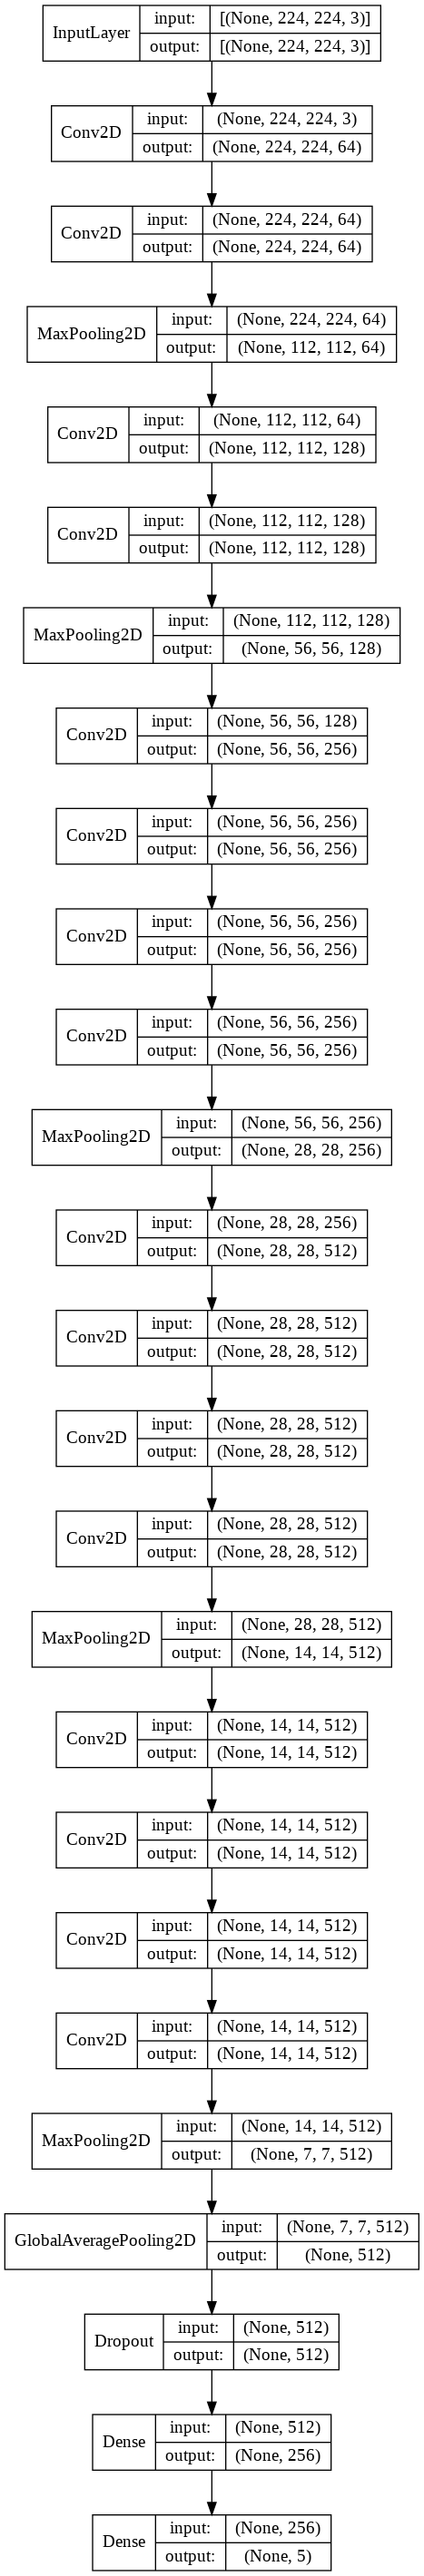

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

***Model compiling & fitting***

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=1e-3, momentum=0.9), 
              loss='categorical_crossentropy' ,
              metrics = ['accuracy']
              )

In [ ]:
hist=model.fit(train_generator,
          epochs=nb_epoch,
          validation_data=validation_generator
         ) 

Epoch 1/15
95/95 [==============================] - 57s 603ms/step - loss: 0.0589 - accuracy: 0.9778 - val_loss: 0.4517 - val_accuracy: 0.8974
Epoch 2/15
95/95 [==============================] - 57s 600ms/step - loss: 0.0724 - accuracy: 0.9758 - val_loss: 0.4203 - val_accuracy: 0.9090
Epoch 3/15
95/95 [==============================] - 57s 601ms/step - loss: 0.0449 - accuracy: 0.9848 - val_loss: 0.4735 - val_accuracy: 0.9090
Epoch 4/15
95/95 [==============================] - 57s 600ms/step - loss: 0.0708 - accuracy: 0.9765 - val_loss: 0.4790 - val_accuracy: 0.8904
Epoch 5/15
95/95 [==============================] - 57s 601ms/step - loss: 0.0498 - accuracy: 0.9861 - val_loss: 0.4683 - val_accuracy: 0.9020
Epoch 6/15
95/95 [==============================] - 57s 602ms/step - loss: 0.0352 - accuracy: 0.9914 - val_loss: 0.4033 - val_accuracy: 0.9144
Epoch 7/15
95/95 [==============================] - 57s 603ms/step - loss: 0.0121 - accuracy: 0.9970 - val_loss: 0.4082 - val_accuracy: 0.9144

***Save the VGG19 architecture to drive***

In [ ]:
results = '/content/drive/MyDrive/PlantClassification/Results'
os.mkdir(results) 

In [ ]:
flowersDataSet = '/content/drive/MyDrive/PlantClassification/Results/flowersDataSet'
os.mkdir(flowersDataSet) 

In [ ]:
VGG19Arch = '/content/drive/MyDrive/PlantClassification/Results/VGG19Arch'
os.mkdir(VGG19Arch) 

In [ ]:
target_dir = '/content/drive/MyDrive/PlantClassification/Results/VGG19Arch'
architecture_name = "VGG19Arch"
#ct = str(datetime.datetime.now())
model.save(target_dir+'/'+architecture_name+'.h5')

***print , plot and save history.csv***

*Print the histoy values*

In [ ]:
print(hist.history)

{'loss': [0.058870263397693634, 0.07237976044416428, 0.044909145683050156, 0.07077240198850632, 0.04978661984205246, 0.03523772582411766, 0.01209605298936367, 0.023391686379909515, 0.007286194246262312, 0.03773876279592514, 0.03409359231591225, 0.03279804065823555, 0.007193727418780327, 0.05275564268231392, 0.012275363318622112], 'accuracy': [0.9778218865394592, 0.9758358001708984, 0.9847732782363892, 0.9764978289604187, 0.9860973358154297, 0.9913935661315918, 0.9970208406448364, 0.9937106966972351, 0.997351884841919, 0.98675936460495, 0.987752377986908, 0.989407479763031, 0.997351884841919, 0.9814630746841431, 0.9963588118553162], 'val_loss': [0.4517095685005188, 0.4203115999698639, 0.473470002412796, 0.47900664806365967, 0.4683172404766083, 0.4032806158065796, 0.40824273228645325, 0.4617409408092499, 0.4496241807937622, 0.5623952746391296, 0.4924373924732208, 0.3787458539009094, 0.4455326199531555, 0.4068378508090973, 0.4198870360851288], 'val_accuracy': [0.897376537322998, 0.9089506

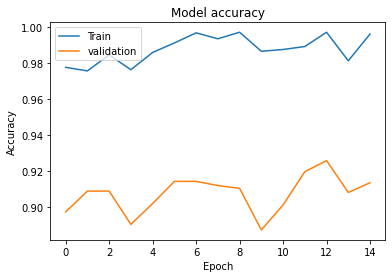

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [ ]:
hist = pd.DataFrame(hist.history)

In [ ]:
hist_csv_file = '/content/drive/MyDrive/PlantClassification/Results/VGG19Arch/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist.to_csv(f)

In [ ]:
train_df.to_csv('/content/drive/MyDrive/PlantClassification/Results/flowersDataSet/train.csv')

In [ ]:
validation_df.to_csv('/content/drive/MyDrive/PlantClassification/Results/flowersDataSet/validation.csv')

In [ ]:
model= model_load()

In [ ]:
img_path = '/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = (img_batch)*(1./255)

result = model.predict(img_preprocessed)
print(result)

[[1.00000000e+00 5.77528425e-08 4.54537493e-12 1.51127200e-09
  1.00315464e-10]]


In [ ]:
index_max=result.argmax(axis=-1)
print(index_max)

[0]


In [ ]:
print(train_generator.class_indices)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [ ]:
model = load_model('/content/drive/MyDrive/PlantClassification/Results/VGG19Arch/VGG19Arch.h5')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     